# Explore here

In [50]:
import seaborn as sns
import pandas as pd


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [51]:
total_data.shape

(366, 2)

In [52]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [53]:
total_data['date'] = pd.to_datetime(total_data['date'])
total_data.set_index('date', inplace=True)
sales_df = total_data.resample('D').sum()
sales_df.ffill(inplace=True)
display(sales_df.head())

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633


A continuación visualizaremos la serie temporal para llevar a cabo un análisis visual de la misma:

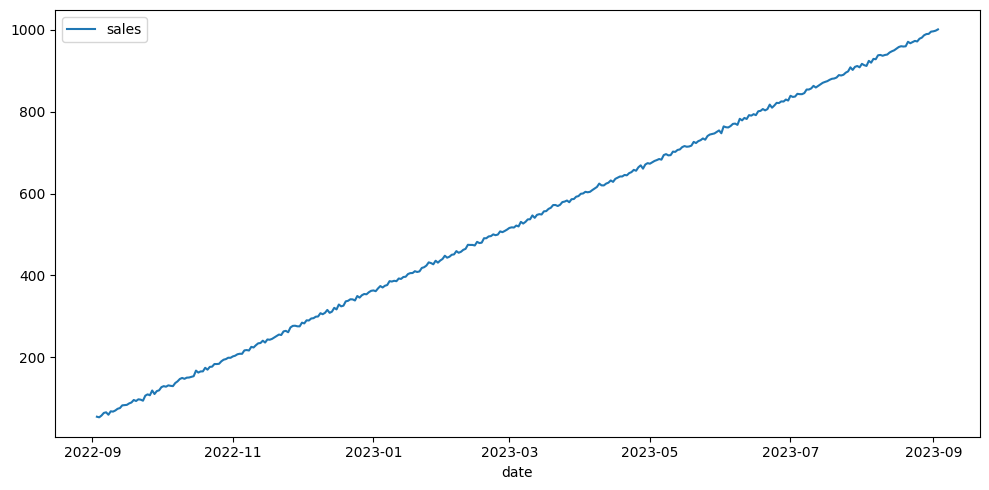

In [54]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_df)
plt.tight_layout()
plt.show()

La gráfica muestra una clara tendencia ascendente a lo largo del tiempo, lo que indica que las ventas generalmente aumentan día a día

Análisis de una serie tempora

Descomposición de la serie

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales_df, period = 12)
decomposition

Análisis de la tendencia

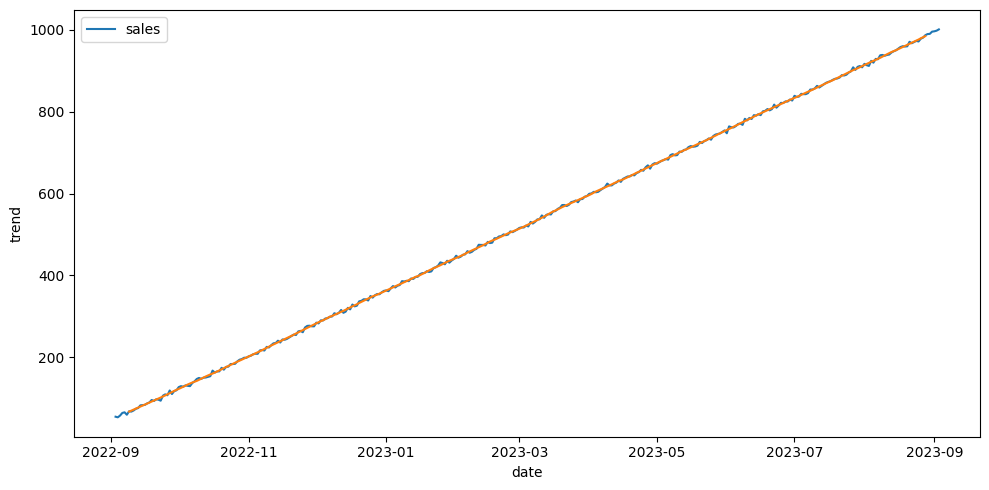

In [56]:
trend = decomposition.trend
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_df)
sns.lineplot(data = trend)
plt.tight_layout()
plt.show()

La gráfica de tendencia confirma la clara tendencia ascendente observada en la visualización inicial.

Análisis de la estacionalidad

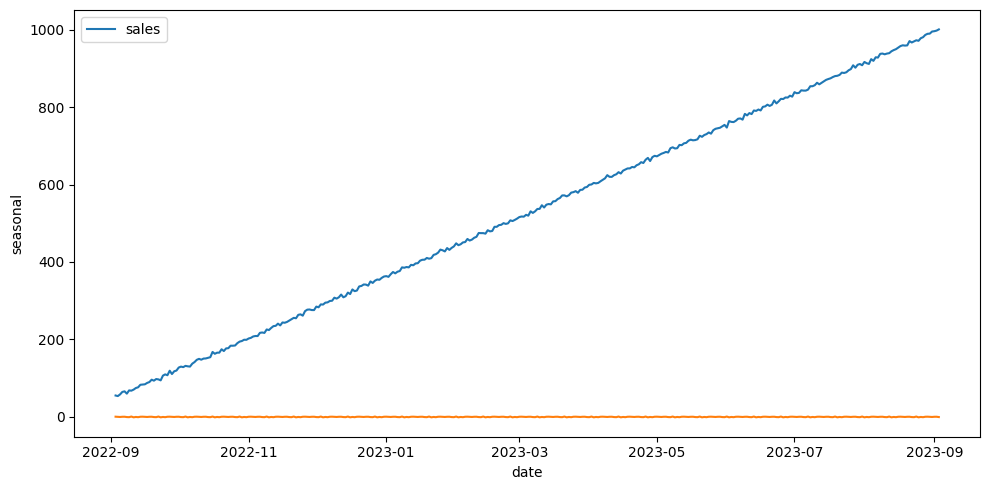

In [57]:
seasonal = decomposition.seasonal
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_df)
sns.lineplot(data = seasonal)
plt.tight_layout()
plt.show()

La componente estacional es muy pequeña en comparación con la tendencia, lo que sugiere que no hay un patrón estacional fuerte

In [58]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(sales_df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Análisis de la variabilidad

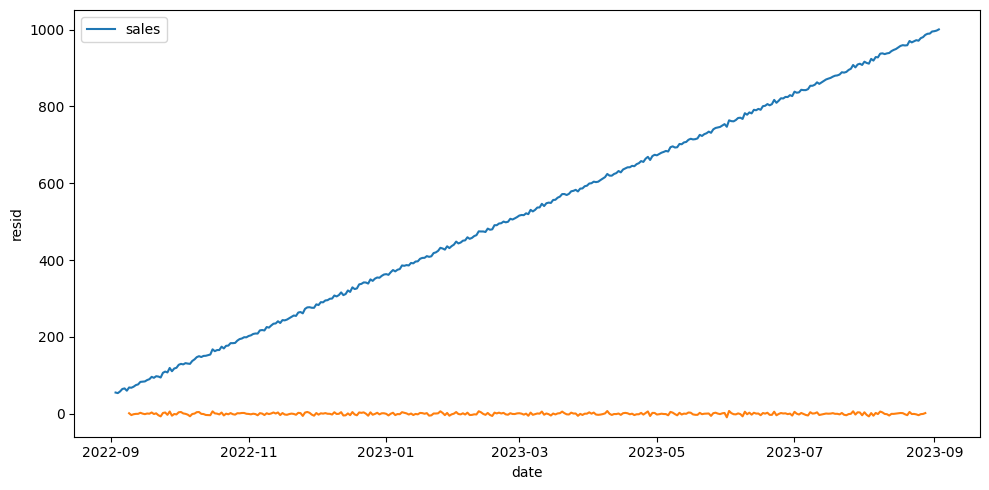

In [59]:
residual = decomposition.resid
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_df)
sns.lineplot(data = residual)
plt.tight_layout()
plt.show()

Los residuos representan la parte de la serie que no puede ser explicada por la tendencia o la estacionalidad. Muestran variaciones aleatorias alrededor de cero, indicando la presencia de ruido en los datos.

Análisis de la autocorrelación

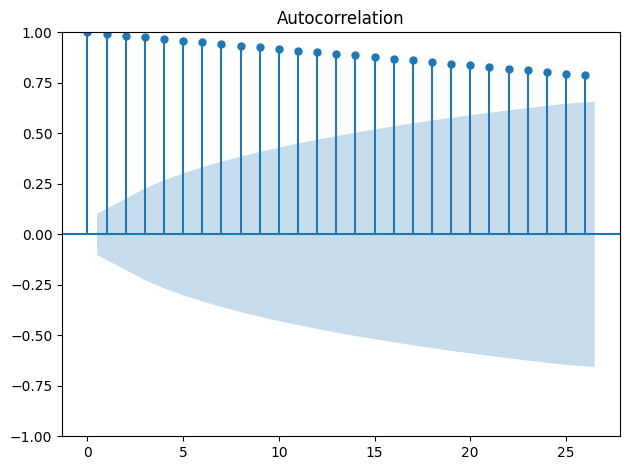

In [60]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sales_df)
plt.tight_layout()
plt.show()

Entrenamiento del modelo

In [61]:
ts_stationary = sales_df.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [65]:
from pmdarima import auto_arima

model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 12)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject